In [1]:
%config Completer.use_jedi = False

In [2]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('df_for_PCA.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Subject_ID,diagadhd,CHILDgender,age,gmd_17Networks_1,zfALFF_17Networks_1,zDCwei_17Networks_1,zReHo_17Networks_1,gmd_17Networks_10,zfALFF_17Networks_10,...,zDCwei_vCa_R,zReHo_vCa_R,gmd_vmPu_L,zfALFF_vmPu_L,zDCwei_vmPu_L,zReHo_vmPu_L,gmd_vmPu_R,zfALFF_vmPu_R,zDCwei_vmPu_R,zReHo_vmPu_R
0,sub-0015,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,sub-0085,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,sub-0134,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,sub-0152,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,sub-0260,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## definig train and test set with adversarial validation (with covariate)

In [4]:
# train-test split evaluation of xgboost model
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# split data into X and y
#X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,2:], data['diagadhd'], test_size=0.3)
training_set, test_set = train_test_split(df, test_size = 0.2, random_state = 3)
X_train = training_set.iloc[:,2:].values
y_train = training_set.iloc[:,1].values
X_test = test_set.iloc[:,2:].values
y_test = test_set.iloc[:,1].values

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

/home/tara/Programming/env/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:37:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 37.50%


In [5]:
#Standardizing the data
trans = StandardScaler().fit(X_train)
X_train = trans.transform(X_train)
X_test = trans.transform(X_test)

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca_fit = pca.fit(X_train)
X_ptrain = pca_fit.transform(X_train)
X_ptest = pca_fit.transform(X_test)

#principalDf = pd.DataFrame(data = X_ptrain, columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8'])

In [7]:
#pca_test = pca.transform(X_test)

In [8]:
#principalDf['diagadhd'] = df['diagadhd']
#principalDf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,diagadhd
0,-6.316805,-3.993803,2.608242,-1.797846,0.423269,-0.187361,-0.873428,2.578733,0.721986,1.400715,0.846745,0
1,-3.483505,3.740295,3.714569,-1.484066,-0.931003,-1.223007,-0.586828,-2.280446,0.442846,-1.359274,0.765042,0
2,-5.072733,-1.089986,-2.044431,-0.990209,4.428666,3.541969,0.361042,-1.697608,1.892826,2.218950,-3.200687,0
3,9.102421,-0.533292,0.310207,6.574109,1.079852,-0.325824,0.913573,1.612537,0.643773,-2.286751,0.774730,0
4,0.069205,-1.513305,0.906918,0.406694,-0.200460,2.936240,-0.700914,0.867545,1.906853,-0.776999,0.059258,1


### Scree plot, explained_variance_ratio_, and explained_variance_ to find proper number of components

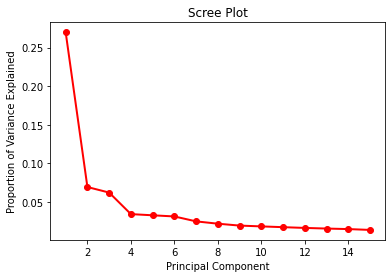

In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [10]:
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
    
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [0.25011705 0.06444237 0.05860287 0.03793637 0.03493877 0.03079932
 0.02369383 0.02028133 0.01952561 0.01795869 0.01719172]
Cumulative Prop. Variance Explained:  [0.25011705 0.31455943 0.3731623  0.41109867 0.44603743 0.47683676
 0.50053059 0.52081192 0.54033753 0.55829622 0.57548794]


In [11]:
print(pca.explained_variance_)

[46.92282182 12.08961172 10.9941008   7.11699336  6.55463309  5.77805932
  4.44504371  3.80484827  3.66307236  3.36911128  3.22522681]


In [12]:
features = df.drop(['Subject_ID', 'diagadhd'], axis =1)

In [13]:
features.head()

,CHILDgender,age,gmd_17Networks_1,zfALFF_17Networks_1,zDCwei_17Networks_1,zReHo_17Networks_1,gmd_17Networks_10,zfALFF_17Networks_10,zDCwei_17Networks_10,zReHo_17Networks_10,...,zDCwei_vCa_R,zReHo_vCa_R,gmd_vmPu_L,zfALFF_vmPu_L,zDCwei_vmPu_L,zReHo_vmPu_L,gmd_vmPu_R,zfALFF_vmPu_R,zDCwei_vmPu_R,zReHo_vmPu_R
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
loadings = pd.DataFrame(pca.components_.T, columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10', 'pc11'], index=features.columns)
#loadings = loadings[['pc1','pc2','pc3','pc4','pc5']]
#PC1 = loadings.sort_values("pc1")
loadings.shape
#loadings.sort_values(by=('pc1'))

(1814, 11)

In [ ]:
#loadings = loadings.loc[(loadings!=0).any(1)]
#loadings.shape

In [ ]:
#loadings.loc['CHILDgender']

In [ ]:
#loadings.loc['age']

In [ ]:
#loadings.sort_values(by='pc1').head(60)

In [ ]:
#plt.scatter(principalDf["pc1"], principalDf["pc2"], c = df["diagadhd"])

### removing features with 0 value in components from features dataframe

In [ ]:
#loadings = loadings.reset_index()
#loadings.head()

In [ ]:
#df = features.copy()
#df2 = pd.DataFrame()
#for col in features.columns:
    #print(col)
#    for feat in loadings['index'].values:
#        if col == feat:
#            df2 = pd.concat([df2, df[[col]]], axis=1)
#            break

In [ ]:
#loadings = loadings.set_index('index')
#loadings.head()

In [16]:
backup_loadings = loadings.copy()

In [17]:
loadings = loadings[abs(loadings["pc1"])>0.1]

In [18]:
loadings.shape

(33, 11)

In [19]:
loadings.sort_values(by = 'pc1')

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
zfALFF_17Networks_RH_ContA_PFCl_4,-0.119598,0.041378,-0.006693,0.003264,-0.030717,0.004062,0.065249,-0.010079,0.079301,0.014696,0.032149
zfALFF_17Networks_RH_SalVentAttnB_PFCl_1,-0.118961,0.000841,0.005337,0.130398,0.013202,-0.004236,-0.033668,0.056895,0.039750,0.031455,0.048256
zfALFF_17Networks_RH_ContA_IPS_4,-0.116965,0.029959,0.051141,-0.065177,-0.018407,-0.019006,0.082104,0.036014,-0.022505,0.053621,0.056176
zfALFF_17Networks_RH_SalVentAttnA_PrC_1,-0.116930,0.014780,-0.023332,-0.033387,-0.056885,-0.003834,0.049523,-0.000008,0.030715,-0.039181,0.001312
zfALFF_17Networks_RH_SalVentAttnB_PFClv_1,-0.116825,0.028476,0.034401,0.055771,0.014487,-0.021693,0.056853,0.028387,0.034580,-0.017586,0.055455
zfALFF_17Networks_LH_DefaultB_PFCd_1,-0.116491,0.065018,0.031210,0.074590,0.062811,-0.009612,-0.001655,-0.074696,0.034183,-0.070068,-0.047728
zfALFF_17Networks_RH_ContA_PFCl_5,-0.115124,0.019775,-0.026139,0.008243,-0.044121,-0.028149,0.037168,0.016844,0.072517,0.068291,0.009483
zfALFF_17Networks_RH_SalVentAttnB_PFCl_2,-0.113270,0.031990,0.036832,0.102809,0.039060,-0.042874,-0.018019,0.000301,0.076244,-0.015044,-0.014270
zfALFF_17Networks_RH_SalVentAttnA_FrOper_3,-0.112678,0.093259,0.010749,0.016979,-0.020539,-0.011301,0.071508,-0.025045,0.052303,0.024821,0.014265
zfALFF_17Networks_RH_DorsAttnB_FEF_3,-0.112594,0.025014,-0.041508,0.000834,-0.062894,0.000411,-0.040300,0.009787,0.040436,-0.070897,-0.006642


## components evaluation figures

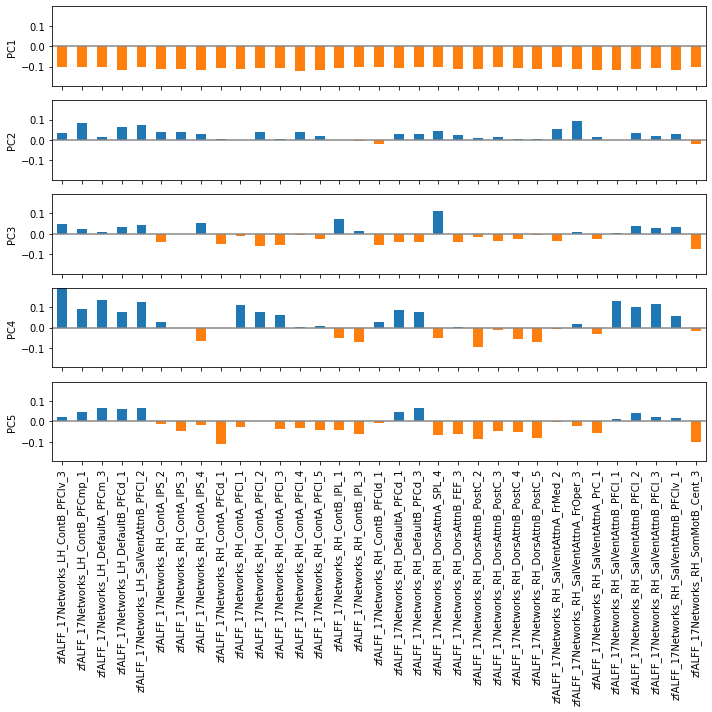

In [20]:
#loadings = pd.DataFrame(pca.components_[0:5, :], 
                    #    columns=features.columns)
#loadings = loadings.loc[(loadings!=0).any(1)]
#loadings = loadings.reset_index()
maxPC = 1.01 * np.max(np.max(np.abs(loadings.iloc[0:5, :])))
f, axes = plt.subplots(5, 1, figsize=(10, 10), sharex=True)
for i, ax in enumerate(axes):
    pc_loadings = loadings.iloc[:, i]
    colors = ['C0' if l > 0 else 'C1' for l in pc_loadings]
    ax.axhline(color='#888888')
    pc_loadings.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'PC{i+1}')
    ax.set_ylim(-maxPC, maxPC)
plt.tight_layout()
plt.show()

In [ ]:
#correlation of features and components
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(50,80)})
ax = sns.heatmap(loadings, annot=True, cmap='Spectral')
plt.show()
#plt.savefig('test.png')

## RF with nested cross validation using just pc1

In [8]:
# Load required packages
from sklearn import datasets
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.svm import SVC

In [22]:
pcadf = principalDf[[ 'diagadhd', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5','pc6','pc7']]
pcadf.head()

,diagadhd,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,0,-6.316805,-3.993803,2.608242,-1.797846,0.423269,-0.187361,-0.873428
1,0,-3.483505,3.740295,3.714569,-1.484066,-0.931003,-1.223007,-0.586828
2,0,-5.072733,-1.089986,-2.044431,-0.990209,4.428666,3.541969,0.361042
3,0,9.102421,-0.533292,0.310207,6.574109,1.079852,-0.325824,0.913573
4,1,0.069205,-1.513305,0.906918,0.406694,-0.200460,2.936240,-0.700914


In [12]:
%%time
#pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))
rf=RandomForestClassifier(random_state=1)
# Create the parameter grid

from sklearn.model_selection import RandomizedSearchCV

# number of trees in RF
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]

# number of features to consider at every split
max_features = ['auto', 'sqrt']

# maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# minimum number of samples required to split a node
min_sample_split = [2, 5, 10]

# minimum number of samples required at each leaf node
min_sample_leaf = [1, 2, 4]

# method of selecting samples for training each tree
bootstrap = [True, False]

# create the random grid
param_grid = [{'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_sample_split,
              'min_samples_leaf': min_sample_leaf,
              'bootstrap': bootstrap}]








# Create the Grid Search estimator instance for selecting model using
# 2-fold StratifiedKFold cross validation

gs = GridSearchCV(estimator=rf, param_grid = param_grid,
                 cv = 3, scoring = 'accuracy', n_jobs = 10, refit = True)

# Calculate the generalization error / accuracy
gs.fit(X_train,y_train)

CPU times: user 23.5 s, sys: 1.92 s, total: 25.5 s
Wall time: 8min 51s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=10,
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                        110, None],
                          'max_features': ['auto', 'sqrt'],
                          'min_samples_leaf': [1, 2, 4],
                          'min_samples_split': [2, 5, 10],
                          'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                           100]}],
             scoring='accuracy')

In [14]:
gs.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 10}

In [17]:
%%time
#clf = make_pipeline(StandardScaler(), kernel = 'linear', C=0.1)
scores = cross_val_score(gs, X_ptrain, y_train, scoring='accuracy', cv=10)

# Print the mean scores and standard deviation
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.638 +/- 0.191
CPU times: user 3min 37s, sys: 10.6 s, total: 3min 47s
Wall time: 1h 27min 11s


In [76]:
#pred = gs.predict(y_test)

In [27]:
gs.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 80}

In [32]:
#clf = make_pipeline(StandardScaler(), kernel = 'linear', C=0.1)
scores = cross_val_score(gs, X_ptest, y_test, scoring='accuracy', cv=10)

# Print the mean scores and standard deviation
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.583 +/- 0.443


# Evaluation

In [39]:
# Confusion matrix
confusion = confusion_matrix(y_test, gs.predict(X_test))
print(confusion)

[[12  2]
 [ 8  2]]


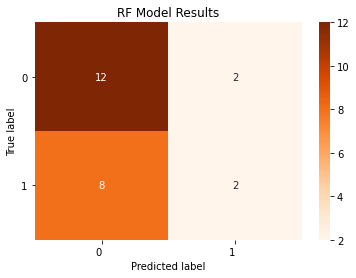

In [40]:
import seaborn as sns

heatmap = sns.heatmap(confusion, annot=True, cmap='Oranges')

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),
                            rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),
                            rotation=0, ha='right')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('RF Model Results')
plt.show()

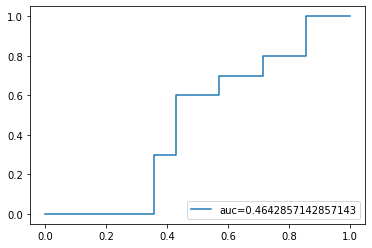

In [41]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [42]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model

print('the sensitivity if this model is: ', TP / float(TP+FN))

# Let us calculate specificity

print('the specificity if this model is: ', TN / float(TN+FP))

the sensitivity if this model is:  0.2
the specificity if this model is:  0.8571428571428571


In [43]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

y_score1 = model.predict_proba(X_test)[:,1]
y_score2 = model.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
print('roc_auc_score for SVM: ', roc_auc_score(y_test, y_score1))

roc_auc_score for SVM:  0.4642857142857143
